### Scanpy and scvi tutorial using chicken heart dataset

In [2]:
import scvi
import scvelo as scv
import scanpy as sc

In [36]:
st_path = "chicken_heart/Visium_D14_adata.h5ad"
st = scv.read(st_path)

#### Doublet removal

In [48]:
st

AnnData object with n_obs × n_vars = 1967 × 2000
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'Spatial_snn_res.1', 'seurat_clusters', 'scanorama_snn_res.1', 'Cardiomyocytes-1', 'Cardiomyocytes-2', 'Immature.myocardial.cells', 'Valve.cells', 'Macrophages', 'Fibroblast.cells', 'Erythrocytes', 'Endocardial.cells', 'MT-enriched.cardiomyocytes', 'Epi-epithelial.cells', 'Vascular.endothelial.cells', 'TMSB4X.high.cells', 'Epi-mesenchymal.cells', 'Dendritic.cells', 'Mural.cells', 'max', 'celltype_prediction_max', 'celltype_prediction', 'celltype_prediction_mode', 'region', 'n_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'n_cells', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_prediction_colors', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_xy_loc', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [38]:
scv.pp.filter_and_normalize(st, min_shared_counts=20, n_top_genes=2000)

Filtered out 10078 genes that are detected 20 counts (shared).
Extracted 2000 highly variable genes.
Logarithmized X.


/home/tbai3/miniforge3/envs/RNAvelo/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [8]:
scvi.model.SCVI.setup_anndata(st)

In [9]:
scvi_vae = scvi.model.SCVI(st)
scvi_vae.train()

# GPU is possible but the dependency conflicts (numpy versions) is hard to resolve...

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/400:   0%|                                                                                                                                                                 | 0/400 [00:00<?, ?it/s]

#### Preprocessing

In [10]:
st.obs.sort_values('n_counts')

,orig.ident,nCount_Spatial,nFeature_Spatial,percent.mito,Spatial_snn_res.1,seurat_clusters,scanorama_snn_res.1,Cardiomyocytes-1,Cardiomyocytes-2,Immature.myocardial.cells,...,Dendritic.cells,Mural.cells,max,celltype_prediction_max,celltype_prediction,celltype_prediction_mode,region,n_counts,_scvi_batch,_scvi_labels
TCTTAGAGTGAACTCT,D14,11726,2267,21.183694,1,0,0,0.520319,0.039561,0.440099,...,0,0.000000,0.520319,Immature myocardial cells,Cardiomyocytes-1,Cardiomyocytes-1,Right ventricle,10280.998047,0,0
CACAGCACCCACGGCA,D14,9618,2129,18.496569,4,5,5,0.358792,0.016326,0.308916,...,0,0.000000,0.358792,Immature myocardial cells,Cardiomyocytes-1,Cardiomyocytes-1,Trabecular LV and \nendocardium,10280.999023,0,0
TGGTAGAATATATGGG,D14,7976,1839,23.345035,7,2,2,0.278899,0.000000,0.300744,...,0,0.003027,0.300744,MT-enriched cardiomyocytes,Immature myocardial cells,Vascular endothelial cells,Atria,10280.999023,0,0
ATATTCAGTTAAACCT,D14,9789,1989,23.914598,1,0,0,0.430681,0.000000,0.470710,...,0,0.000000,0.470710,Immature myocardial cells,Immature myocardial cells,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10280.999023,0,0
TCGCAAAGATGCATTT,D14,5994,1513,18.735402,1,0,0,0.586830,0.000000,0.291048,...,0,0.000000,0.586830,TMSB4X high cells,Cardiomyocytes-1,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10280.999023,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTGGCCGAATATCTA,D14,8703,1843,10.674480,13,6,6,0.001266,0.000000,0.000000,...,0,0.000000,0.985307,Erythrocytes,Erythrocytes,Erythrocytes,Epicardium,10281.000977,0,0
CATGGTAAGTAGCGTT,D14,5025,1341,18.587065,1,0,0,0.597591,0.000000,0.402409,...,0,0.000000,0.597591,Immature myocardial cells,Cardiomyocytes-1,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10281.000977,0,0
CCACAATGTACGTCTT,D14,7288,1791,17.933589,1,0,0,0.221246,0.034605,0.210977,...,0,0.000000,0.346622,Vascular endothelial cells,Vascular endothelial cells,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10281.000977,0,0
GCTACAATCGAGGATA,D14,2982,1027,20.053655,7,3,3,0.619428,0.000000,0.207679,...,0,0.000000,0.619428,Immature myocardial cells,Cardiomyocytes-1,Cardiomyocytes-1,Atria,10281.001953,0,0


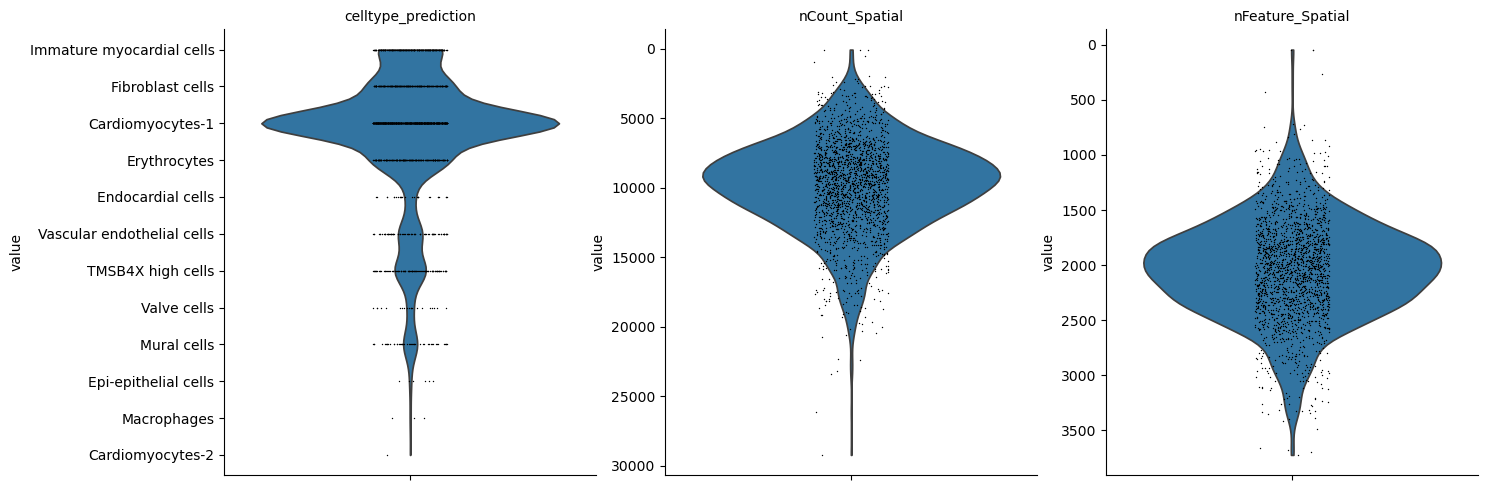

In [23]:
sc.pl.violin(st, ['celltype_prediction', 'nCount_Spatial', 'nFeature_Spatial'], multi_panel=True)

In [39]:
st.X

array([[0.76195383, 0.43006867, 0.        , ..., 0.        , 0.9229728 ,
        0.633926  ],
       [0.90242076, 0.        , 0.        , ..., 0.        , 0.6134132 ,
        0.6134132 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6712462 , 0.6712462 , 0.46286982, ..., 0.46286982, 1.015021  ,
        0.46286982],
       [0.5845587 , 0.5845587 , 0.        , ..., 0.        , 0.5845587 ,
        0.5845587 ],
       [0.9755962 , 0.54257727, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [40]:
st.X.sum(axis=1)   # look likes normalized

array([817.2397, 801.3792, 741.0446, ..., 829.9212, 739.5379, 839.0702],
      dtype=float32)

#### Clustering

In [41]:
sc.pp.pca(st, n_comps=40)   # will add a 'x_pca' obsm

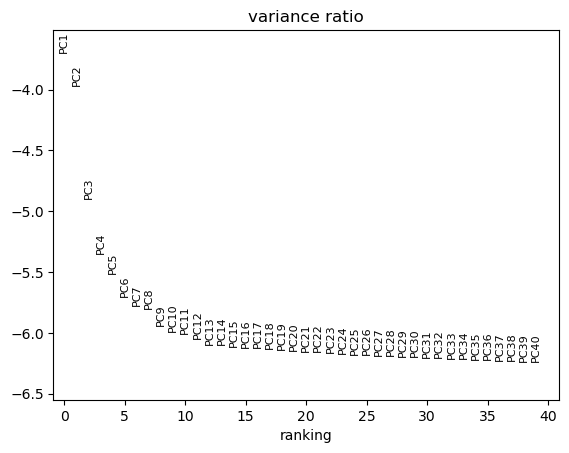

In [42]:
sc.pl.pca_variance_ratio(st, log=True, n_pcs=40)

# at 40 the curve starts to flatten out

In [43]:
sc.pp.neighbors(st, n_pcs=40)

# get euclidean (default) neighbors based on 40 PCs

In [44]:
st.obsp['connectivities']

<1967x1967 sparse matrix of type '<class 'numpy.float32'>'
	with 47324 stored elements in Compressed Sparse Row format>

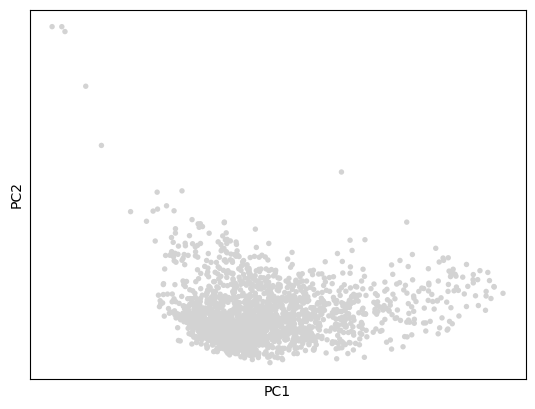

In [45]:
sc.pl.pca(st)

In [46]:
sc.tl.umap(st)

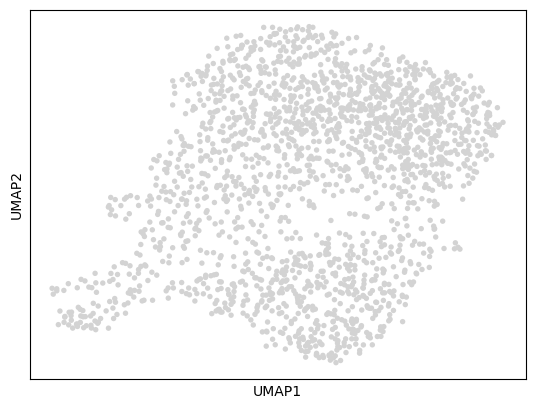

In [47]:
sc.pl.umap(st)

In [53]:
sc.tl.leiden(st, resolution=0.7)  # to cluster. Higher resolution -> more clusters

In [54]:
st.obs

,orig.ident,nCount_Spatial,nFeature_Spatial,percent.mito,Spatial_snn_res.1,seurat_clusters,scanorama_snn_res.1,Cardiomyocytes-1,Cardiomyocytes-2,Immature.myocardial.cells,...,Epi-mesenchymal.cells,Dendritic.cells,Mural.cells,max,celltype_prediction_max,celltype_prediction,celltype_prediction_mode,region,n_counts,leiden
AAACAAGTATCTCCCA,D14,13254,2446,19.277199,7,2,2,0.248662,0.002676,0.291200,...,0.000000,0,0.000000,0.291200,MT-enriched cardiomyocytes,Immature myocardial cells,Erythrocytes,Atria,10281.0,1
AAACATTTCCCGGATT,D14,14259,2439,23.893681,7,2,2,0.285085,0.000000,0.369797,...,0.000000,0,0.000000,0.369797,Cardiomyocytes-1,Immature myocardial cells,Vascular endothelial cells,Atria,10281.0,1
AAACCCGAACGAAATC,D14,6800,1856,14.338235,13,6,6,0.005008,0.000000,0.000000,...,0.011129,0,0.021135,0.752036,Fibroblast cells,Fibroblast cells,Fibroblast cells,Epicardium,10281.0,3
AAACCGTTCGTCCAGG,D14,10725,2090,21.212121,1,0,0,0.397038,0.000000,0.289122,...,0.000000,0,0.000000,0.397038,Vascular endothelial cells,Cardiomyocytes-1,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10281.0,0
AAACCTAAGCAGCCGG,D14,9931,1980,15.547276,7,2,2,0.016108,0.002674,0.003484,...,0.000000,0,0.000000,0.958324,Erythrocytes,Erythrocytes,Erythrocytes,Atria,10281.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGTTTCCCGAAAG,D14,15129,2849,12.961861,12,8,8,0.000000,0.000000,0.000000,...,0.117749,0,0.032358,0.555955,Fibroblast cells,Fibroblast cells,Fibroblast cells,Valves,10281.0,5
TTGTTAGCAAATTCGA,D14,8408,1781,20.611323,1,0,0,0.588776,0.039379,0.333438,...,0.000000,0,0.000000,0.588776,Immature myocardial cells,Cardiomyocytes-1,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10281.0,0
TTGTTCAGTGTGCTAC,D14,12109,2482,13.461062,4,0,0,0.383047,0.000000,0.364800,...,0.000000,0,0.000000,0.383047,Immature myocardial cells,Cardiomyocytes-1,Cardiomyocytes-1,Trabecular LV and \nendocardium,10281.0,2
TTGTTGTGTGTCAAGA,D14,7822,1741,19.803119,1,0,0,0.867228,0.000000,0.097680,...,0.000000,0,0.000000,0.867228,Cardiomyocytes-1,Cardiomyocytes-1,Cardiomyocytes-1,Compact LV and \ninter-ventricular septum,10281.0,0


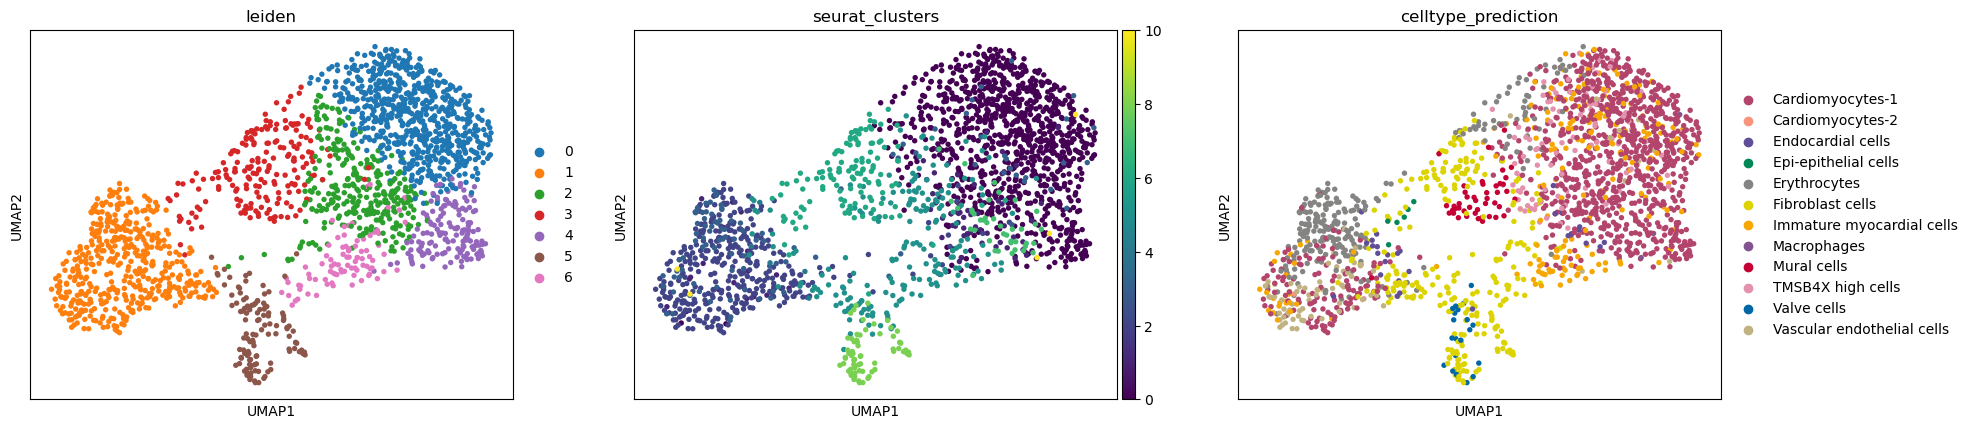

In [56]:
sc.pl.umap(st, color=['leiden', 'seurat_clusters', 'celltype_prediction'])

#### Cell type prediction

In [58]:
sc.tl.rank_genes_groups(st, 'leiden')

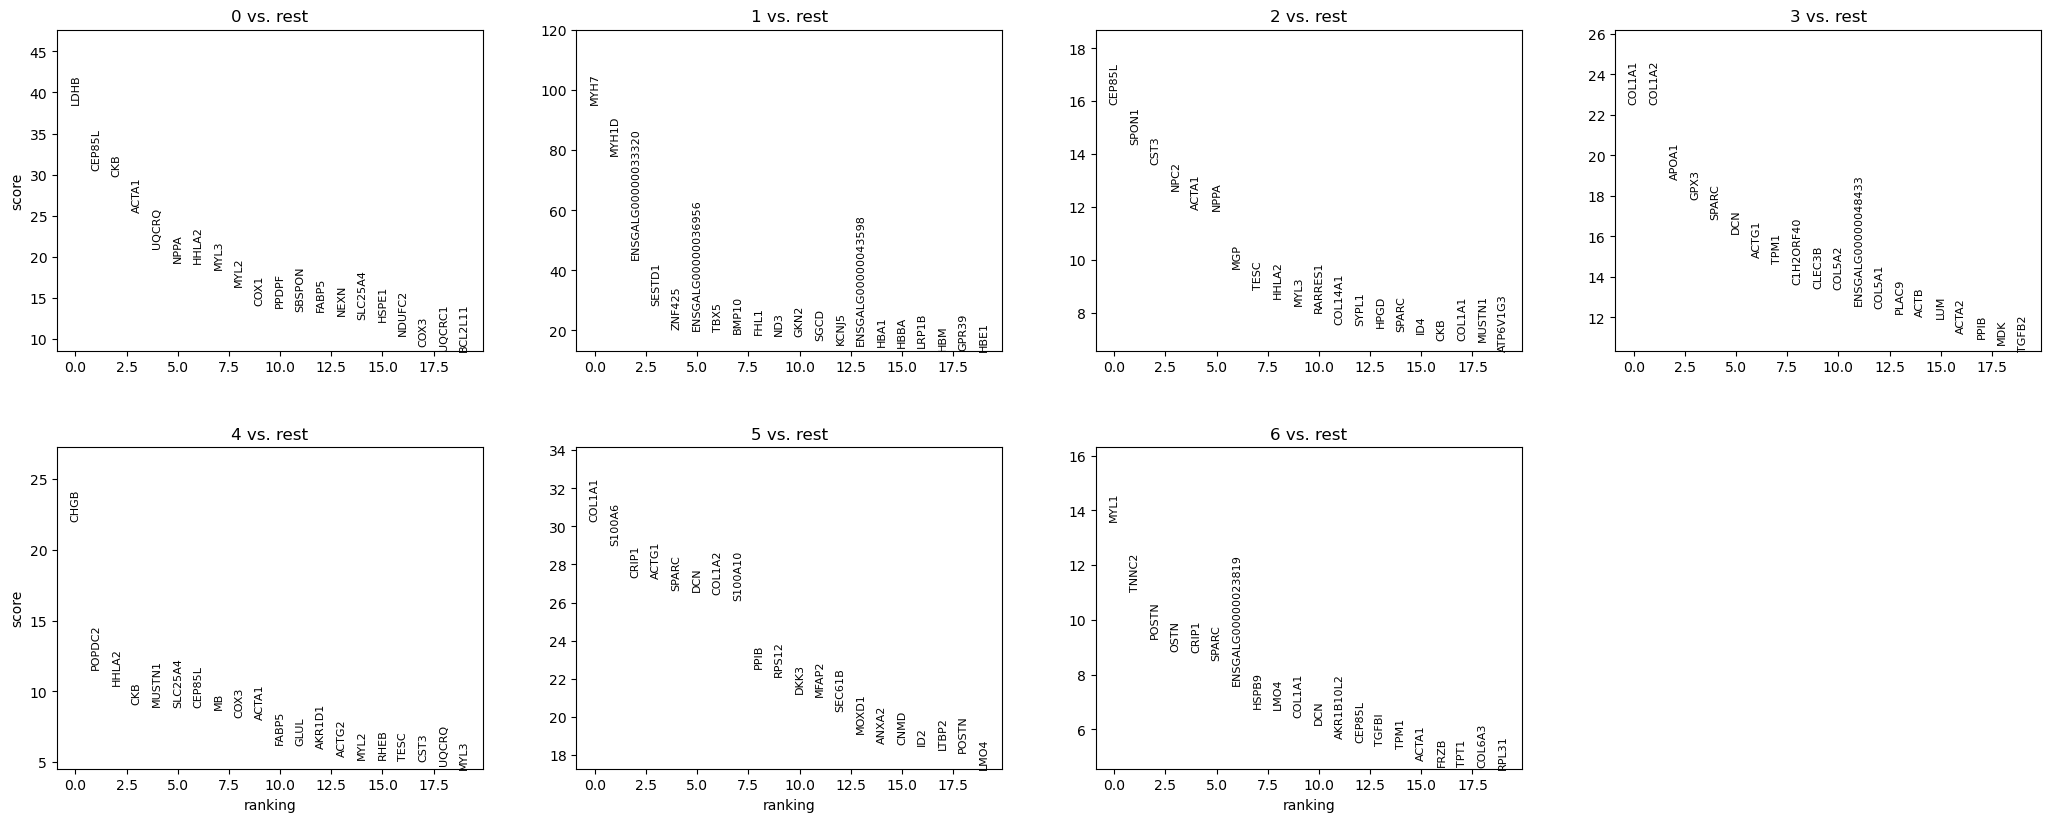

In [59]:
sc.pl.rank_genes_groups(st, n_genes=20, sharey=False)

In [61]:
markers = sc.get.rank_genes_groups_df(st, None)

In [63]:
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

In [64]:
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,LDHB,38.635586,0.926455,7.693706e-241,1.538741e-237
1,0,CEP85L,30.550264,0.920675,9.195162e-167,9.195162e-164
2,0,CKB,29.841562,1.165703,1.106799e-161,7.378658e-159
3,0,ACTA1,25.384766,0.764561,5.284516e-123,1.321129e-120
4,0,UQCRQ,21.053074,0.571021,2.665376e-88,3.553835e-86
...,...,...,...,...,...,...
12058,6,ENSGALG00000054317,2.923333,1.183628,4.361624e-03,2.186278e-02
12061,6,CDON,2.737105,0.820255,7.418349e-03,3.601140e-02
12063,6,LUM,2.657939,0.506676,9.198461e-03,4.422337e-02
12064,6,DPT,2.657512,1.097913,9.268141e-03,4.445151e-02


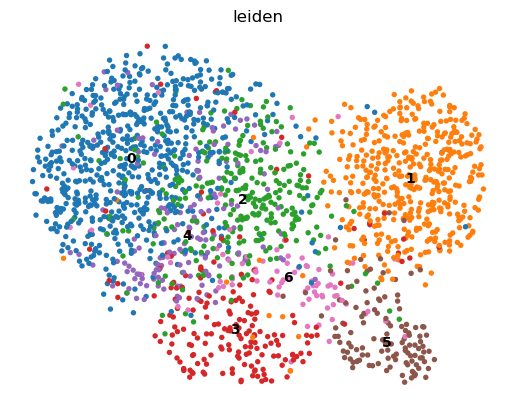

In [135]:
sc.pl.umap(st, color=['leiden'], frameon=False, legend_loc='on data')

#### Dimensionality reduction

In [66]:
st

AnnData object with n_obs × n_vars = 1967 × 2000
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'Spatial_snn_res.1', 'seurat_clusters', 'scanorama_snn_res.1', 'Cardiomyocytes-1', 'Cardiomyocytes-2', 'Immature.myocardial.cells', 'Valve.cells', 'Macrophages', 'Fibroblast.cells', 'Erythrocytes', 'Endocardial.cells', 'MT-enriched.cardiomyocytes', 'Epi-epithelial.cells', 'Vascular.endothelial.cells', 'TMSB4X.high.cells', 'Epi-mesenchymal.cells', 'Dendritic.cells', 'Mural.cells', 'max', 'celltype_prediction_max', 'celltype_prediction', 'celltype_prediction_mode', 'region', 'n_counts', 'leiden'
    var: 'gene_ids', 'n_cells', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_prediction_colors', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_xy_loc', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [68]:
scvi.model.SCVI.setup_anndata(st)

In [125]:
scvi_vae = scvi.model.SCVI(st, n_latent=16, n_layers=1)
scvi_vae.train(max_epochs=400, early_stopping=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [1:05:57<00:00, 10.02s/it, v_num=1, train_loss_step=514, train_loss_epoch=514]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [1:05:57<00:00,  9.89s/it, v_num=1, train_loss_step=514, train_loss_epoch=514]


In [127]:
scvi_vae.save('scvi_vae3')

In [146]:
scvi_vae = scvi.model.SCVI.load('scvi_vae2', st)

INFO     File scvi_vae2.pb/model.pt already downloaded                                                             


In [147]:
scvi_latent = scvi_vae.get_latent_representation()

In [148]:
scvi_latent.shape

(1967, 32)

In [149]:
st.obsm['scvi_latent'] = scvi_latent

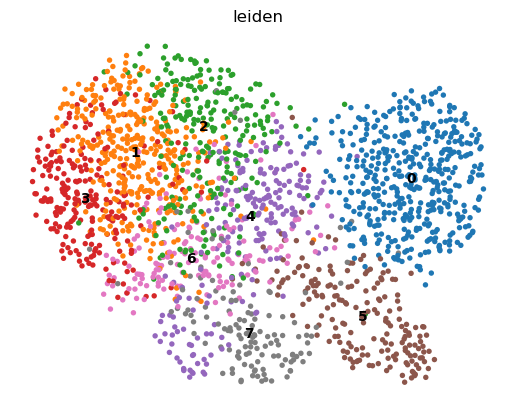

In [150]:
sc.pl.umap(st, color=['leiden'], frameon=False, legend_loc='on data')

In [132]:
st.write_h5ad('modified.h5ad')

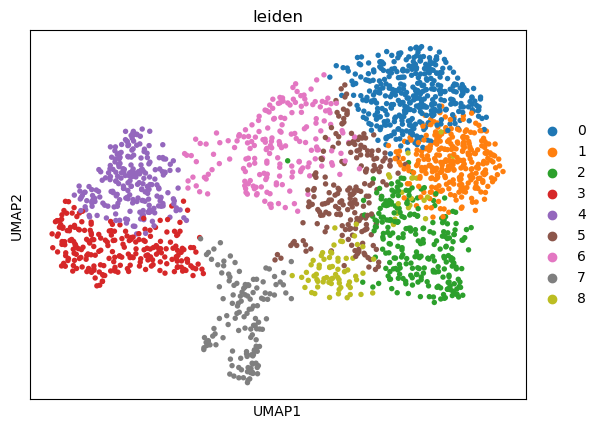

In [157]:
sc.pp.neighbors(st, use_rep='X_pca', n_pcs=32)
# try either X_pca or scvi_latent
sc.tl.umap(st)
sc.tl.leiden(st)
sc.pl.umap(st, color='leiden')

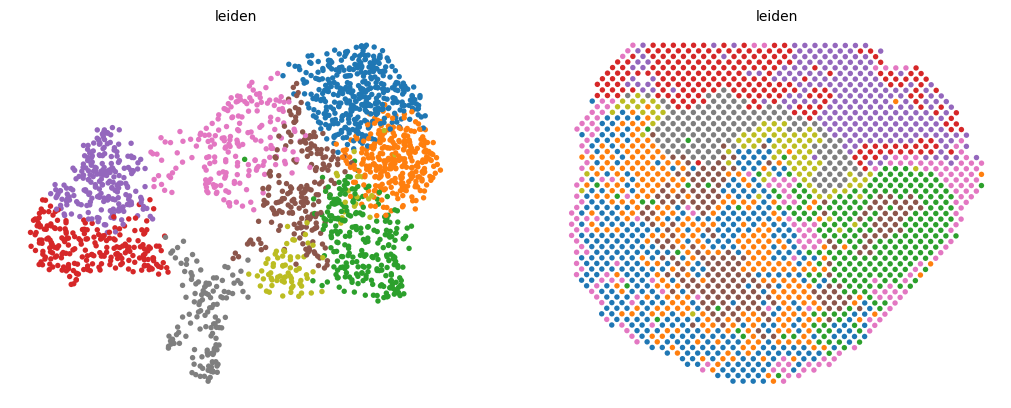

In [158]:
scv.pl.scatter(st, basis=['X_umap', 'X_xy_loc'], color='leiden')

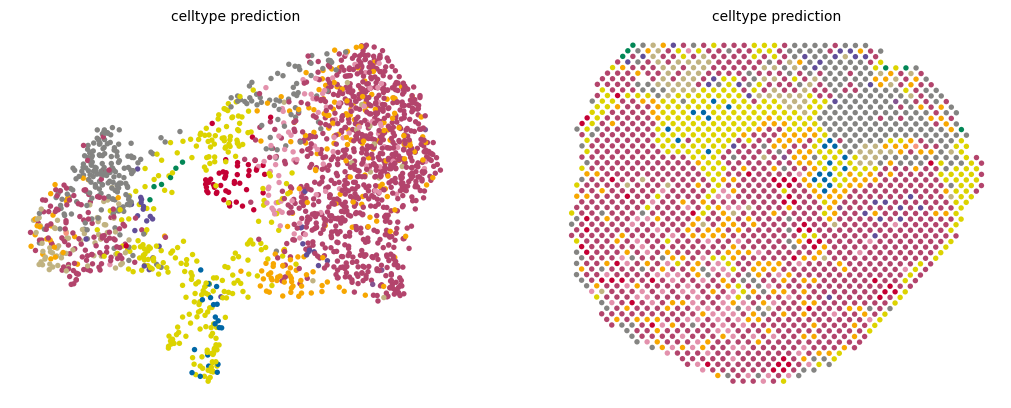

In [159]:
scv.pl.scatter(st, basis=['X_umap', 'X_xy_loc'], color='celltype_prediction')